<a href="https://colab.research.google.com/github/tanya-54/MLCOE-TASK2/blob/main/CreditDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
##Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [11]:
##Loading dataset
data = pd.read_csv("/content/Raw_Data_Singapore Credit Dataset.csv")

In [12]:
data

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 SGD,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 SGD,30,good,car,3857,< 100 SGD,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 SGD,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 SGD,45,good,furniture/appliances,1845,< 100 SGD,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [13]:
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [14]:
data.shape

(1000, 17)

In [15]:
##checking datatypes of each column
data.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [16]:
#checking all the columns present in the dataset
data.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [17]:
# checkimg null values
data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [18]:
#gaining basic info about te datset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

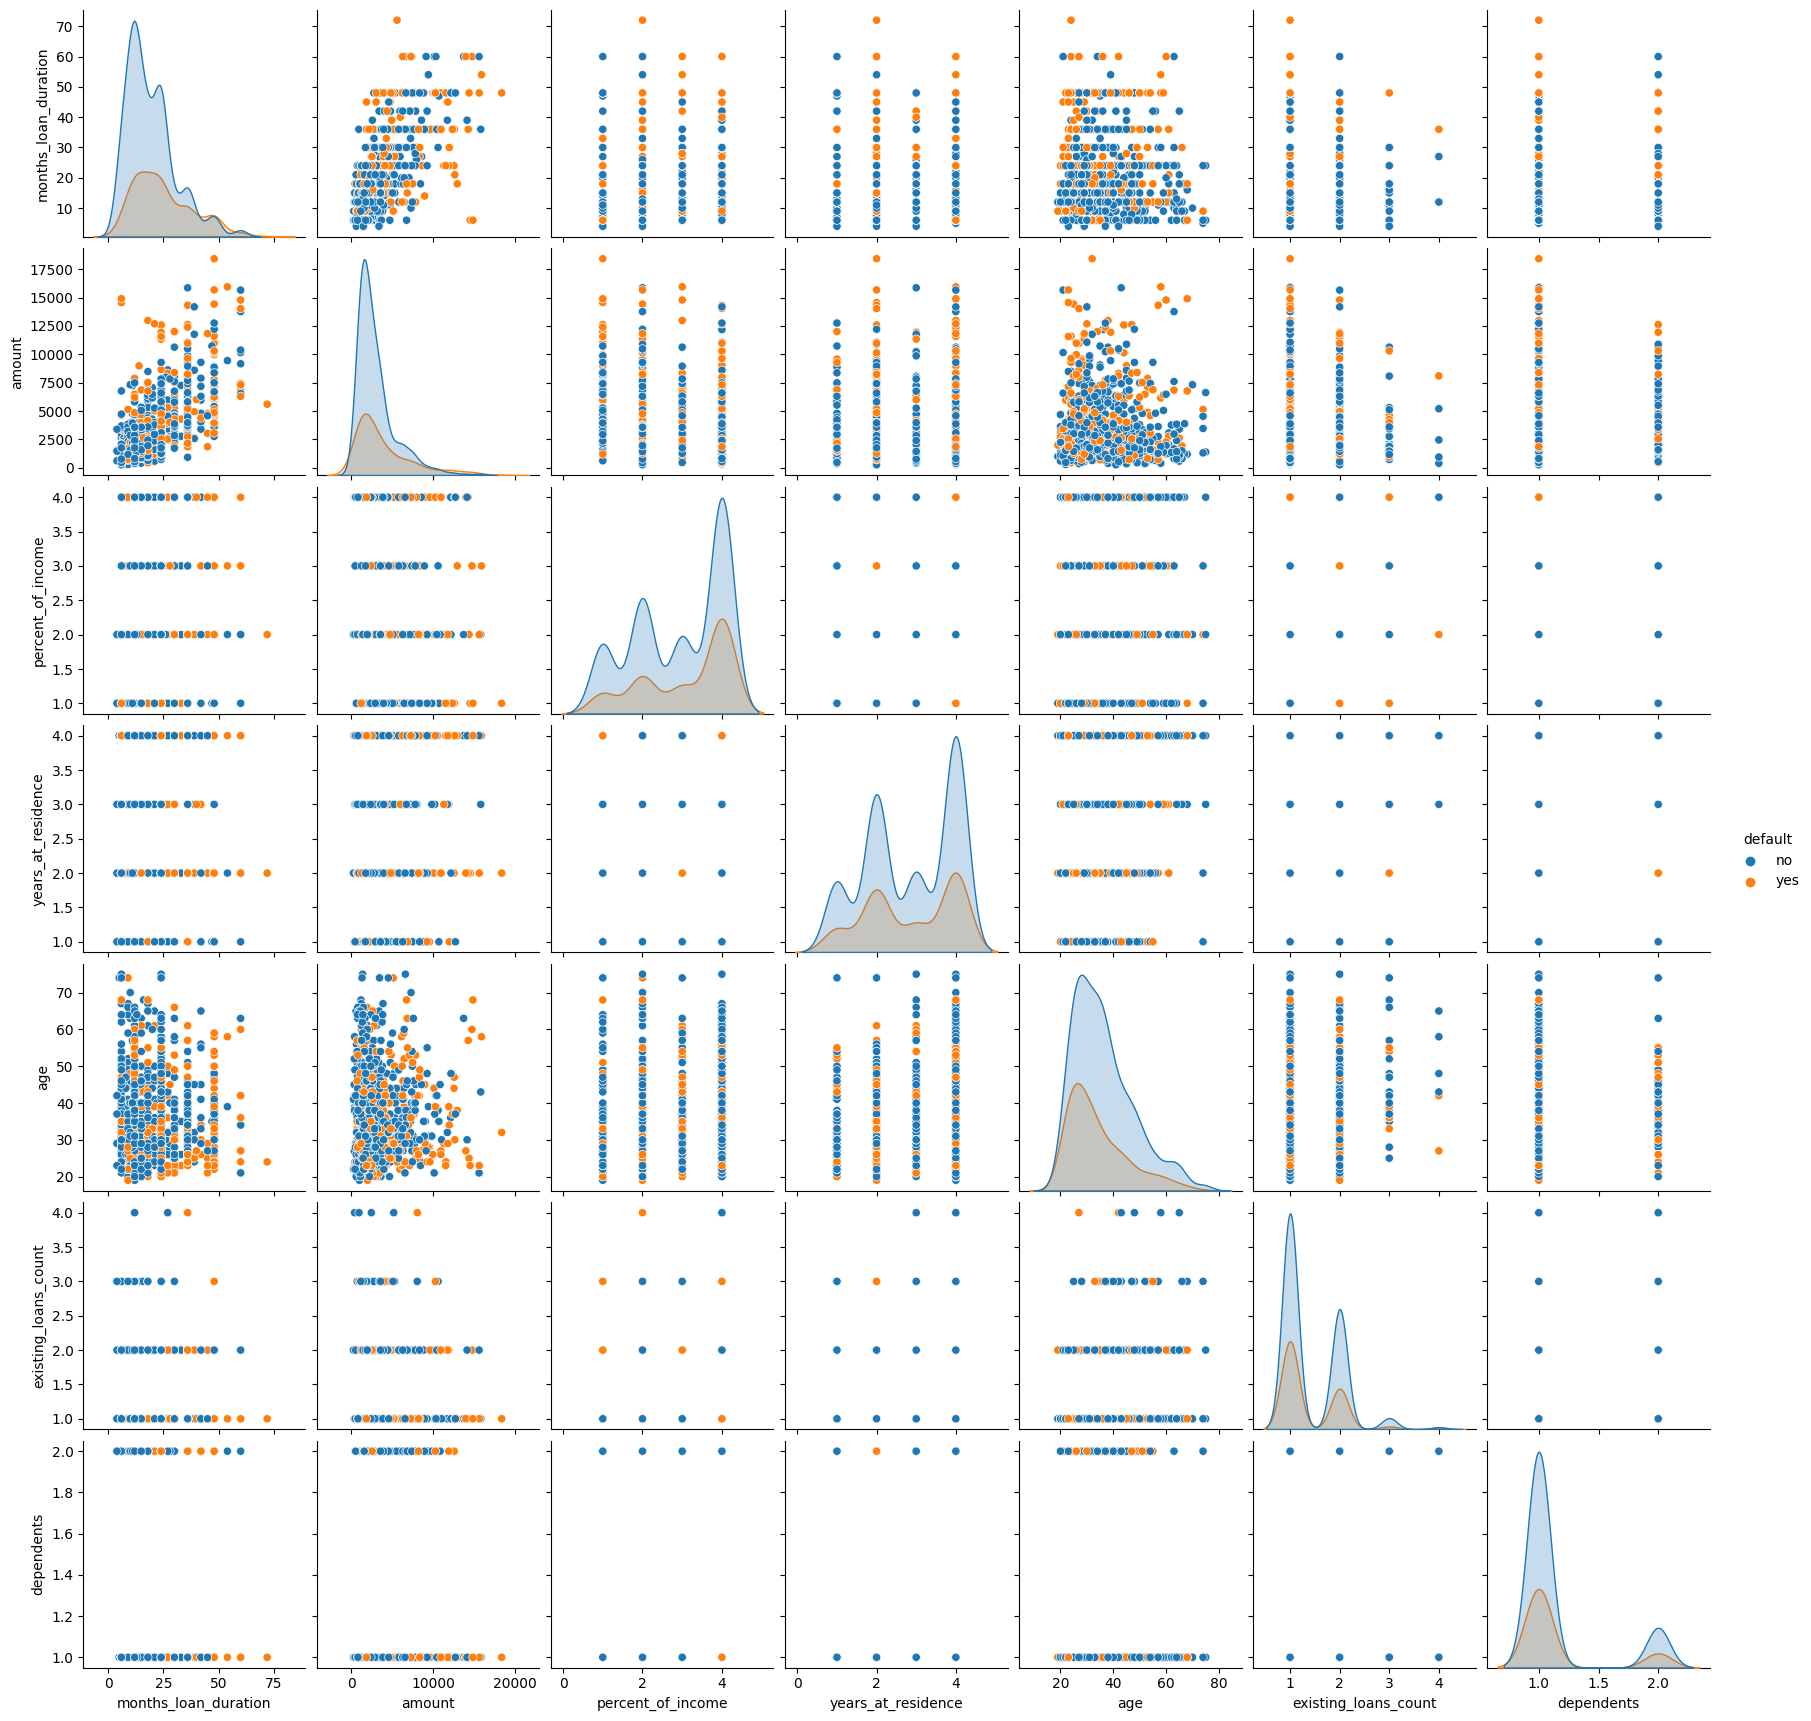

In [19]:
## pairplot to visualize the pairwise relationships between numeric variables
sns.pairplot(data, hue='default',kind='scatter')
plt.show()

<ipython-input-20-3623309517f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

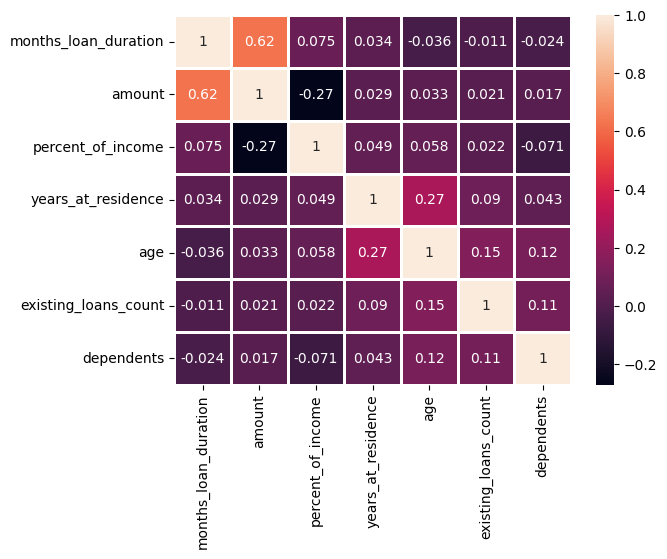

In [20]:
##heatmap to find correlation
corr = data.corr()
sns.heatmap(corr, annot = True, linewidths = 0.75)

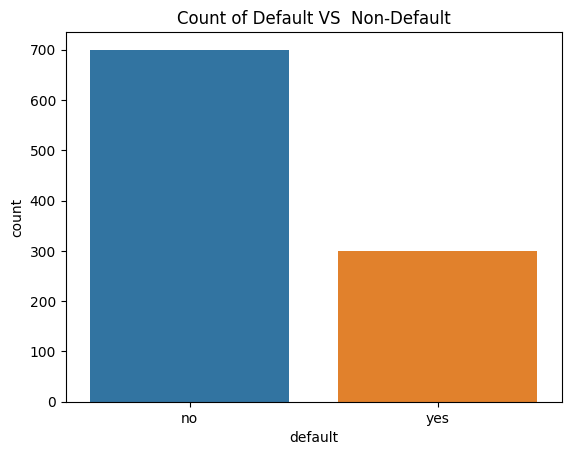

In [21]:
##countplot for the default variable
sns.countplot(x='default', data=data)
plt.title("Count of Default VS  Non-Default")
plt.show()

<!-- max = Q3 +1.5*IQR
min = Q1 - 1.5 *IQR
median below edge = 25th percentile and medians above percentile isth percentile  -->

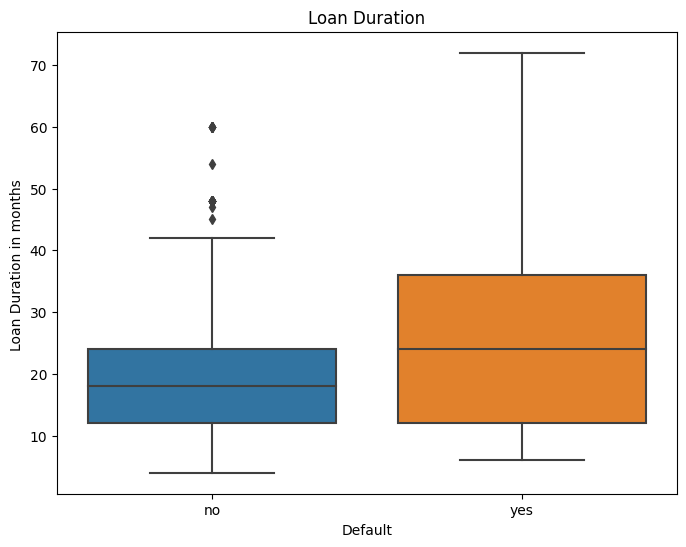

In [22]:
# visualizations between loan duration in months and default

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='default', y='months_loan_duration')
plt.xlabel('Default')
plt.ylabel('Loan Duration in months ')
plt.title('Loan Duration')
plt.show()

In [23]:
# max = Q3 +1.5*IQR
# min = Q1 - 1.5*IQR
# median below edge is 25th percentile and above edge is 75th percentile

In [24]:
data['credit_history'].unique()

array(['critical', 'good', 'poor', 'perfect', 'very good'], dtype=object)

In [25]:
data.loc[data['credit_history'] == 'critical', 'credit_history'] = '0'
data.loc[data['credit_history'] == 'poor', 'credit_history'] = '1'
data.loc[data['credit_history'] == 'good', 'credit_history'] = '2'
data.loc[data['credit_history'] == 'perfect', 'credit_history'] = '4'
data.loc[data['credit_history'] == 'very good', 'credit_history'] = '3'

In [26]:
data['credit_history'].value_counts()

2    530
0    293
1     88
3     49
4     40
Name: credit_history, dtype: int64

In [27]:
#Analyzing the 'checking_balance' column
data['checking_balance'].value_counts()

unknown        394
< 0 SGD        274
1 - 200 SGD    269
> 200 SGD       63
Name: checking_balance, dtype: int64

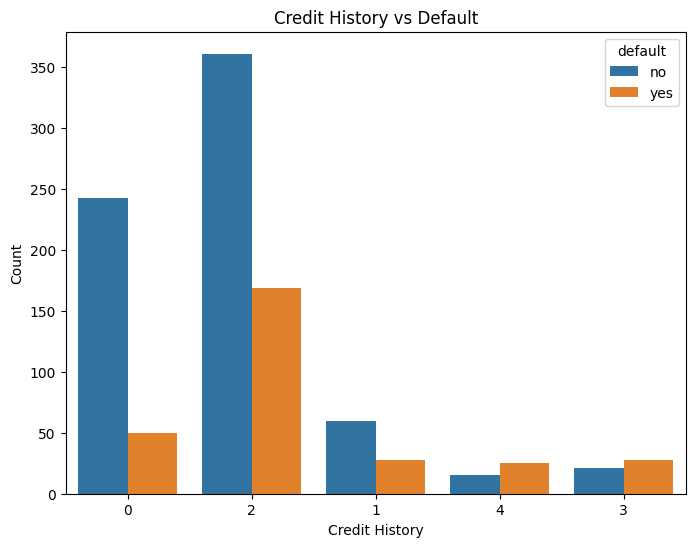

In [28]:
##countplot for credit_history vs default
plt.figure(figsize=(8, 6))
sns.countplot(x='credit_history', hue='default', data=data)
plt.title("Credit History vs Default")
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

In [29]:
#analysing purpode of loan with default
pd.crosstab(data['purpose'], data['default'], normalize = 'index')

default,no,yes
purpose,,
business,0.649485,0.350515
car,0.685460,0.314540
car0,0.583333,0.416667
education,0.610169,0.389831
furniture/appliances,0.737844,0.262156
renovations,0.636364,0.363636


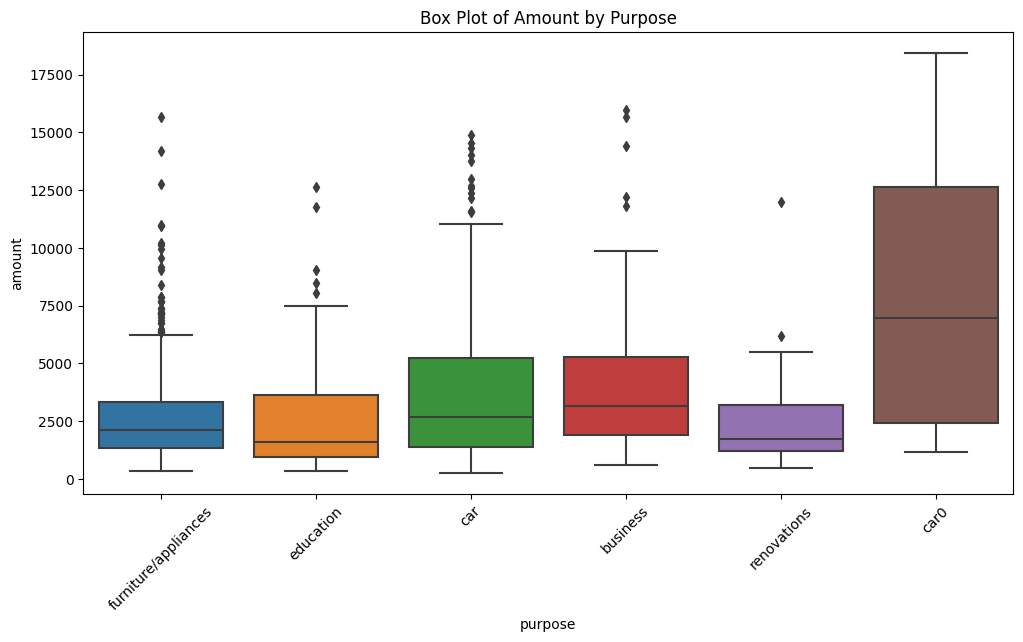

In [30]:
# visualizing the purpose of loan
plt.figure(figsize=(12, 6))
sns.boxplot(x='purpose', y='amount', data=data)
plt.title("Box Plot of Amount by Purpose")
plt.xticks(rotation=45)
plt.show()

<ipython-input-31-2e9f051d95c6>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


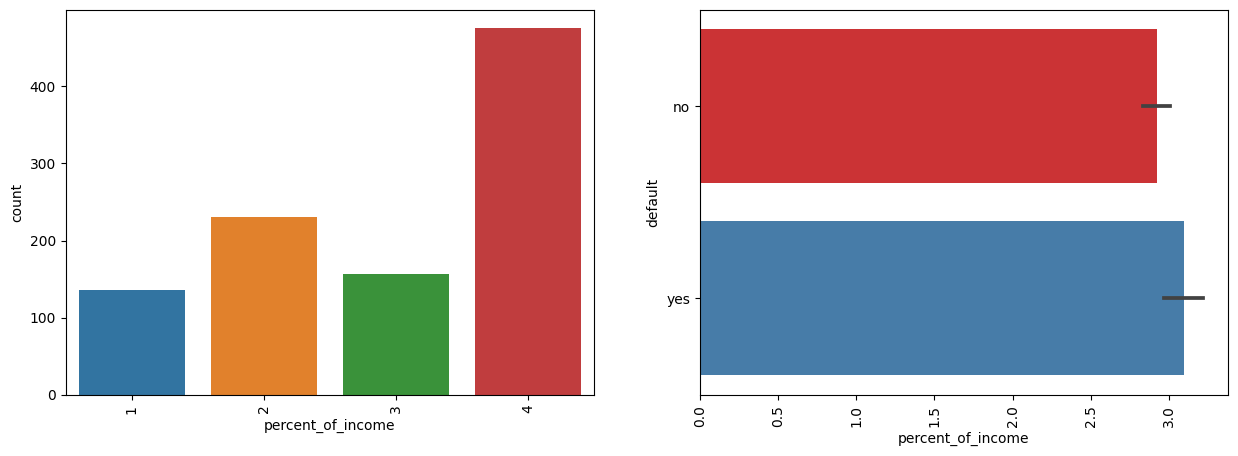

In [31]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.barplot(x = 'percent_of_income', y = 'default', data = data, palette = 'Set1', ax = axes[1])
sns.countplot(x='percent_of_income', data = data, ax = axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
plt.show()

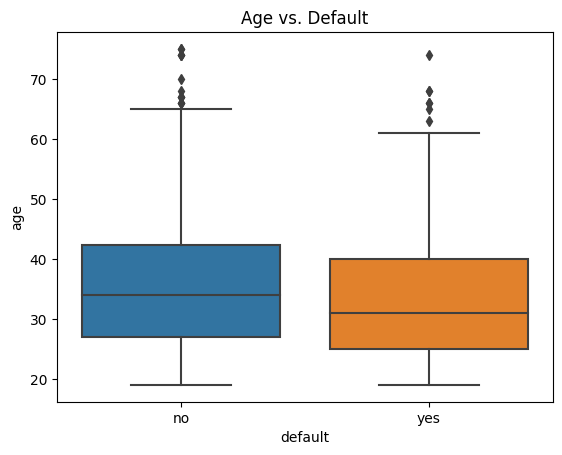

In [32]:
##box plot to find realtionship between default and age
sns.boxplot(x='default', y='age', data=data)
plt.title("Age vs. Default")
plt.show()

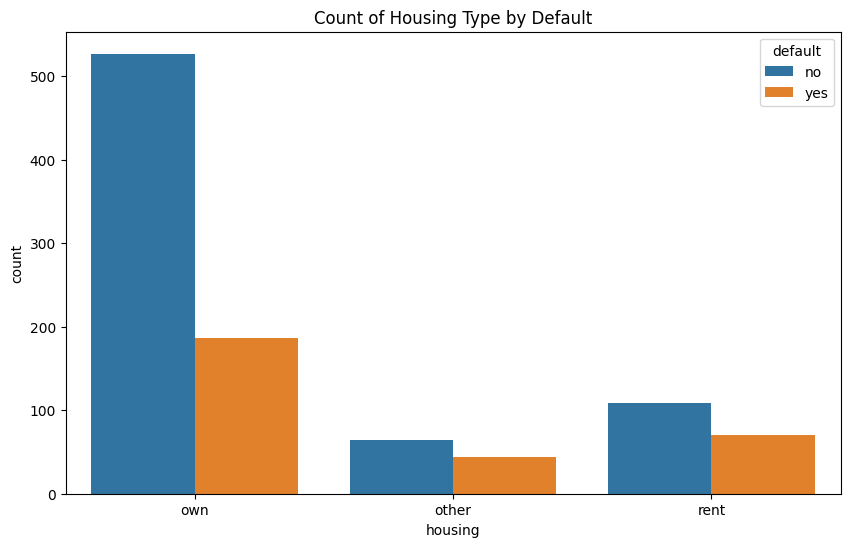

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='housing', data=data, hue='default')
plt.title("Count of Housing Type by Default")
plt.show()

Handling outliners


In [55]:
columns=data.columns

In [34]:
df = pd.DataFrame(data)

In [56]:
def remove_outliers_iqr(dataframe, columns, threshold=1.5):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    return dataframe

In [57]:
columns_to_remove_outliers = ['age', 'purpose', 'months_loan_duration']

In [59]:
threshold_value = 1.5
df = remove_outliers_iqr(data, columns_to_remove_outliers, threshold_value)

KeyError: ignored

In [60]:
print("Original DataFrame:")
print(data)

Original DataFrame:
     checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                   1                     6               0        4    1169   
1                   0                    48               2        4    5951   
2                   3                    12               0        3    2096   
3                   1                    42               2        4    7882   
4                   1                    24               1        1    4870   
..                ...                   ...             ...      ...     ...   
995                 3                    12               2        4    1736   
996                 1                    30               2        1    3857   
997                 3                    12               2        4     804   
998                 1                    45               2        4    1845   
999                 0                    45               0        1    4576   

     savings_balanc

In [62]:
print("\nDataFrame after removing outliers:")
print(df)


DataFrame after removing outliers:
     checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                   1                     6               0        4    1169   
1                   0                    48               2        4    5951   
2                   3                    12               0        3    2096   
3                   1                    42               2        4    7882   
4                   1                    24               1        1    4870   
..                ...                   ...             ...      ...     ...   
995                 3                    12               2        4    1736   
996                 1                    30               2        1    3857   
997                 3                    12               2        4     804   
998                 1                    45               2        4    1845   
999                 0                    45               0        1    4576   

   

In [35]:
#analysing the year of residence column
data['years_at_residence'].value_counts()

4    413
2    308
3    149
1    130
Name: years_at_residence, dtype: int64

In [36]:
 pd.crosstab(data['years_at_residence'], data['default'], normalize = 'index')

default,no,yes
years_at_residence,,
1,0.723077,0.276923
2,0.685065,0.314935
3,0.711409,0.288591
4,0.699758,0.300242


In [37]:
#Analyzing the other credit column
data['other_credit'].value_counts()

none     814
bank     139
store     47
Name: other_credit, dtype: int64

In [38]:
#Analyzing the existing_loans_count column
data['existing_loans_count'].value_counts()

1    633
2    333
3     28
4      6
Name: existing_loans_count, dtype: int64

In [39]:
#Analyzing the job column
data['job'].value_counts()


skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64

In [40]:
# analyzing the dependents column
data['dependents'].value_counts()

1    845
2    155
Name: dependents, dtype: int64

In [41]:
#analyzing phone column
data['phone'].value_counts()

no     596
yes    404
Name: phone, dtype: int64

In [42]:
#DataPreprocessing

In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
data['checking_balance'] = label_encoder.fit_transform(data['checking_balance'])
data['credit_history'] = label_encoder.fit_transform(data['credit_history'])
data['purpose'] = label_encoder.fit_transform(data['purpose'])
data['savings_balance'] = label_encoder.fit_transform(data['savings_balance'])
data['employment_duration'] = label_encoder.fit_transform(data['employment_duration'])
data['other_credit'] = label_encoder.fit_transform(data['other_credit'])
data['housing'] = label_encoder.fit_transform(data['housing'])
data['job'] = label_encoder.fit_transform(data['job'])
data['phone'] = label_encoder.fit_transform(data['phone'])
data['default'] = label_encoder.fit_transform(data['default'])


In [44]:
X = data.drop(columns=['default'])
y = data['default']


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# standarise the data using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
#fitting logistic model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
#predict on test data a
y_pred = model.predict(X_test)

In [49]:
#calculating the accuracy:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [50]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.715
Confusion Matrix:
 [[127  14]
 [ 43  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       141
           1       0.53      0.27      0.36        59

    accuracy                           0.71       200
   macro avg       0.64      0.59      0.59       200
weighted avg       0.68      0.71      0.68       200



In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


In [52]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       141
           1       0.53      0.27      0.36        59

    accuracy                           0.71       200
   macro avg       0.64      0.59      0.59       200
weighted avg       0.68      0.71      0.68       200



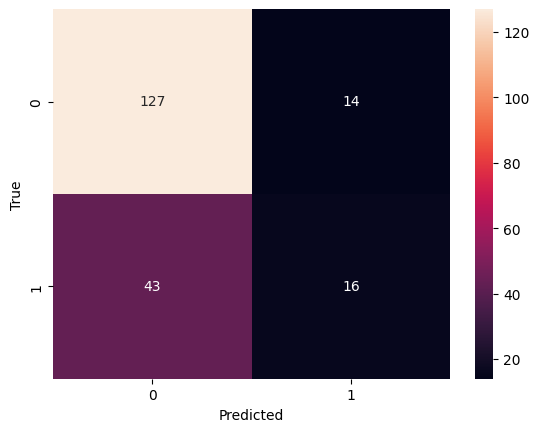

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()